In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [75]:
df=pd.read_csv("Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [76]:
df.shape

(20000, 13)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


#Preprocessing Data

In [78]:
df.isnull().mean()*100

student_id          0.0
age                 0.0
gender              0.0
course              0.0
study_hours         0.0
class_attendance    0.0
internet_access     0.0
sleep_hours         0.0
sleep_quality       0.0
study_method        0.0
facility_rating     0.0
exam_difficulty     0.0
exam_score          0.0
dtype: float64

In [79]:
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [80]:
label_en=LabelEncoder()
df['gender']=label_en.fit_transform(df['gender'])
df['course']=label_en.fit_transform(df['course'])
df['internet_access']=label_en.fit_transform(df['internet_access'])
df['sleep_quality']=label_en.fit_transform(df['sleep_quality'])
df['study_method']=label_en.fit_transform(df['study_method'])
df['facility_rating']=label_en.fit_transform(df['facility_rating'])
df['exam_difficulty']=label_en.fit_transform(df['exam_difficulty'])
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,1,6,2.78,92.9,1,7.4,2,0,1,1,58.9
1,2,23,2,5,3.37,64.8,1,4.6,0,3,2,2,54.8
2,3,22,1,1,7.88,76.8,1,8.5,2,0,0,2,90.3
3,4,20,2,6,0.67,48.4,1,5.8,0,3,1,2,29.7
4,5,20,0,6,0.89,71.6,1,9.8,2,0,1,2,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,2,4,6.50,71.3,1,5.0,1,4,1,0,86.5
19996,19998,18,1,0,3.71,41.6,0,5.9,0,0,2,2,60.9
19997,19999,19,2,6,7.88,68.2,1,4.6,2,1,1,0,64.5
19998,20000,19,1,4,4.60,76.3,0,6.1,1,4,2,2,79.0


#feature scaling

In [81]:
scaler=StandardScaler()
features=['study_hours','class_attendance','sleep_hours','age']
scaled_df=df.copy()
scaled_df[features]=scaler.fit_transform(df[features])

#split the data

classification report :
              precision    recall  f1-score   support

           0       0.42      0.30      0.35      2531
           1       0.11      0.20      0.14       654
           2       0.47      0.50      0.48      2815

    accuracy                           0.38      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.41      0.38      0.39      6000



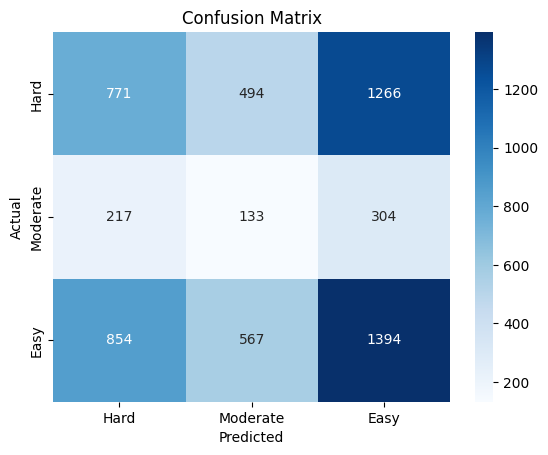

In [82]:
X=scaled_df[['study_hours', 'class_attendance', 'age', 'sleep_hours']]
y=scaled_df['exam_difficulty']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("classification report :")
print(classification_report(y_pred,y_test))

confus_matrix=confusion_matrix(y_pred,y_test)
sns.heatmap(confus_matrix,annot=True,cmap="Blues",fmt="d",xticklabels=["Hard","Moderate","Easy"],yticklabels=["Hard","Moderate","Easy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [83]:
print("------See Your Result------")
try:
    age=float(input("Enter your age :"))
    studyhrs=float(input("Enter your study hours :"))
    classattendance=float(input("Enter your class attendance :"))
    sleephours=float(input("Enter your sleep hours "))

    user_input_data=pd.DataFrame([{
        'age':age,
        'study_hours':studyhrs,
        'class_attendance':classattendance,
        'sleep_hours':sleephours
    }])
    user_input_scale=scaler.fit_transform(user_input_data)
    predicted_result=model.predict(user_input_scale)[0]
    if predicted_result==0:
        print("Easy")
    elif predicted_result==1:
        print("Hard")
    elif predicted_result==2:
        print("Moderate")
except Exception as e:
    print(f"An error occured :{e}")

------See Your Result------


Enter your age : 18
Enter your study hours : 7
Enter your class attendance : 89
Enter your sleep hours  7


Moderate


C:\Users\satyajit\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
